# **Importing Necessary Libraries**

In [ ]:
import numpy as np
import torch
import os
import random
#from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
import torch.nn as nn
import torch.optim as optim
from google.colab import drive

# Mount Google Drive to access the dataset
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset Path**

In [ ]:
train_dir = '/content/drive/MyDrive/Dental X-ray/Training'
test_dir = '/content/drive/MyDrive/Dental X-ray/Testing'

# **Image Data Loading**

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



# Load the dataset
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Class names
class_names = train_dataset.classes
print("Classes:", class_names)


Classes: ['carious', 'non_carious']


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# Load the dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Class names
class_names = test_dataset.classes
print("Classes:", class_names)


Classes: ['carious', 'non-carious']


In [ ]:
import os
from PIL import Image

def label_images(dataset_dir):
    labels = []  # To store labels
    image_paths = []  # To store image paths
    class_names = os.listdir(dataset_dir)  # Get the list of class names (folder names)

    for class_name in class_names:
        class_folder = os.path.join(dataset_dir, class_name)

        if os.path.isdir(class_folder):  # Check if it's a folder
            for image_name in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_name)
                if image_name.endswith(('.jpg', '.png', '.jpeg')):  # Only process image files
                    image_paths.append(image_path)
                    labels.append(class_name)  # Assign the label based on the folder name

    return image_paths, labels

# Example usage
#train_dir = 'path_to_train_dataset'  # Update with your training data path
#test_dir = 'path_to_test_dataset'  # Update with your testing data path

# Labeling training images
train_image_paths, train_labels = label_images(train_dir)

# Labeling testing images
test_image_paths, test_labels = label_images(test_dir)

# Display the results
for i in range(10):  # Display the first 10 labeled images as an example
    print(f"Image Path: {train_image_paths[i]}, Label: {train_labels[i]}")

for i in range(10):  # Display the first 10 labeled images as an example
    print(f"Image Path: {test_image_paths[i]}, Label: {test_labels[i]}")


Image Path: /content/drive/MyDrive/Dental X-ray/Training/non_carious/01.png, Label: non_carious
Image Path: /content/drive/MyDrive/Dental X-ray/Training/non_carious/12.png, Label: non_carious
Image Path: /content/drive/MyDrive/Dental X-ray/Training/non_carious/06.png, Label: non_carious
Image Path: /content/drive/MyDrive/Dental X-ray/Training/non_carious/07.png, Label: non_carious
Image Path: /content/drive/MyDrive/Dental X-ray/Training/non_carious/04.png, Label: non_carious
Image Path: /content/drive/MyDrive/Dental X-ray/Training/non_carious/32.png, Label: non_carious
Image Path: /content/drive/MyDrive/Dental X-ray/Training/non_carious/55.png, Label: non_carious
Image Path: /content/drive/MyDrive/Dental X-ray/Training/non_carious/38.png, Label: non_carious
Image Path: /content/drive/MyDrive/Dental X-ray/Training/non_carious/30.png, Label: non_carious
Image Path: /content/drive/MyDrive/Dental X-ray/Training/non_carious/31.png, Label: non_carious
Image Path: /content/drive/MyDrive/Denta

# **Counting Images**

In [ ]:
from torchvision import datasets

# Load the dataset
#train_dir = '/content/drive/MyDrive/Dental X-ray/Training'  # Replace with your testing folder path
train_dataset = datasets.ImageFolder(root=train_dir)

# Get class names and their indices
class_names = train_dataset.classes  # Class names (e.g., ['carious', 'non-carious'])
class_to_idx = train_dataset.class_to_idx  # Mapping of class names to indices
print("Class Names and Indices:", class_to_idx)

# Count images in each class
from collections import Counter

class_counts = Counter()
for _, label in train_dataset.samples:  # test_dataset.samples contains (image_path, label)
    class_counts[class_names[label]] += 1

print("Class Distribution:")
for class_name, count in class_counts.items():
    print(f" - {class_name}: {count} images")

# Check overall dataset size
print(f"Total Images in Training Folder: {len(train_dataset)}")


Class Names and Indices: {'carious': 0, 'non_carious': 1}
Class Distribution:
 - carious: 40 images
 - non_carious: 40 images
Total Images in Training Folder: 80


In [ ]:
from torchvision import datasets

# Load the dataset
#test_dir = '/content/drive/MyDrive/Dental X-ray/Testing'  # Replace with your testing folder path
test_dataset = datasets.ImageFolder(root=test_dir)

# Get class names and their indices
class_names = test_dataset.classes  # Class names (e.g., ['carious', 'non-carious'])
class_to_idx = test_dataset.class_to_idx  # Mapping of class names to indices
print("Class Names and Indices:", class_to_idx)

# Count images in each class
from collections import Counter

class_counts = Counter()
for _, label in test_dataset.samples:  # test_dataset.samples contains (image_path, label)
    class_counts[class_names[label]] += 1

print("Class Distribution:")
for class_name, count in class_counts.items():
    print(f" - {class_name}: {count} images")

# Check overall dataset size
print(f"Total Images in Testing Folder: {len(test_dataset)}")


Class Names and Indices: {'carious': 0, 'non-carious': 1}
Class Distribution:
 - carious: 10 images
 - non-carious: 10 images
Total Images in Testing Folder: 20


# **Shape of the Images**

In [ ]:
from PIL import Image
import os

# Loop through the training folder and check image shapes
for class_name in os.listdir(train_dir):
    class_folder = os.path.join(train_dir, class_name)
    if os.path.isdir(class_folder):  # Check only folders
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            with Image.open(image_path) as img:
                print(f"Class: {class_name}, Shape: {img.size}")  # (width, height)
            break  # Display the shape of one image per class


Class: non_carious, Shape: (224, 224)
Class: carious, Shape: (224, 224)


In [ ]:
from PIL import Image
import os

# Loop through the testing folder and check image shapes
for class_name in os.listdir(test_dir):
    class_folder = os.path.join(test_dir, class_name)
    if os.path.isdir(class_folder):  # Check only folders
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            with Image.open(image_path) as img:
                print(f"Class: {class_name}, Shape: {img.size}")  # (width, height)
            break  # Display the shape of one image per class


Class: carious, Shape: (224, 224)
Class: non-carious, Shape: (224, 224)


# **Visualize a Random Image**

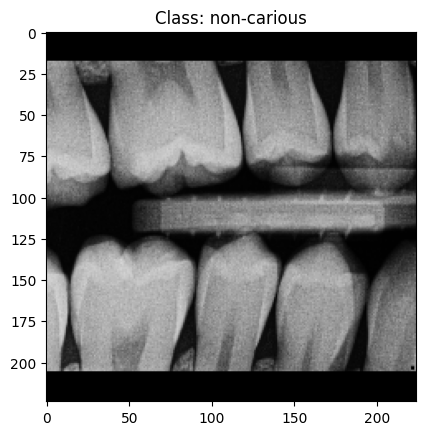

In [ ]:
# Function to visualize a random image from the dataset
def visualize_random_image(dataset, class_names):
    # Randomly pick an image from the dataset
    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    # Convert the tensor back to numpy array for imshow (H, W, C)
    #random_image = random_image.permute(1, 2, 0).numpy()

    # Display the image
    plt.imshow(random_image)
    plt.title(f"Class: {class_names[label]}")  # Display class name as title
    plt.show()

# Call the function to visualize a random image
visualize_random_image(train_dataset, class_names)

# **Train the Model**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class SqueezeExcitation(nn.Module):
    def __init__(self, channels, reduction=16):
        super(SqueezeExcitation, self).__init__()
        self.fc1 = nn.Linear(channels, channels // reduction)
        self.fc2 = nn.Linear(channels // reduction, channels)

    def forward(self, x):
        # Global average pooling
        avg_pool = F.adaptive_avg_pool2d(x, (1, 1))
        avg_pool = avg_pool.view(avg_pool.size(0), -1)  # Flatten
        avg_pool = F.relu(self.fc1(avg_pool))
        avg_pool = torch.sigmoid(self.fc2(avg_pool)).view(x.size(0), x.size(1), 1, 1)
        return x * avg_pool.expand_as(x)

class Enhanced_CNN_LSTM_Model(nn.Module):
    def __init__(self, hidden_size=128, num_classes=2):
        super(Enhanced_CNN_LSTM_Model, self).__init__()

        # Pretrained ResNet model as feature extractor
        resnet = models.resnet50(pretrained=True)
        self.resnet = nn.Sequential(*list(resnet.children())[:-2])  # Remove the fully connected layers

        # Squeeze-and-Excitation block for improved feature recalibration
        self.se = SqueezeExcitation(channels=2048)

        # LSTM layer (Bidirectional LSTM)
        self.lstm = nn.LSTM(input_size=2048, hidden_size=hidden_size, num_layers=2, batch_first=True, bidirectional=True)

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size * 2, 512)  # Adjusted for bidirectional LSTM
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Extract features using pretrained ResNet (without the final fully connected layers)
        x = self.resnet(x)

        # Apply Squeeze-and-Excitation (SE) block
        x = self.se(x)

        # Global Average Pooling
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = x.view(x.size(0), -1)  # Flatten the output

        # Reshape for LSTM (batch_size, seq_len=1, feature_size)
        x = x.view(x.size(0), 1, -1)  # Reshape for LSTM input

        # Pass through LSTM
        lstm_out, (hn, cn) = self.lstm(x)

        # Use the hidden state of the last time step (bidirectional, hence use hn[-1] and hn[-2])
        out = torch.cat((hn[-2], hn[-1]), dim=1)  # Concatenate the two directions

        # Fully connected layers
        out = F.relu(self.fc1(out))
        out = self.fc2(out)

        return out

# Example usage
model = Enhanced_CNN_LSTM_Model(hidden_size=128, num_classes=2)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms
import time


In [ ]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=10):
    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        start_time = time.time()  # Track time per epoch

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Calculate loss
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()

            # Update weights
            optimizer.step()

            # Update statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate accuracy and print loss and accuracy for the epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        epoch_time = time.time() - start_time

        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Time: {epoch_time:.2f}s")

    print("Training Complete!")
# Instantiate the model, loss function, and optimizer

# Check if CUDA (GPU) is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

hidden_size = 128  # Specify the hidden size for LSTM
model = Enhanced_CNN_LSTM_Model(hidden_size=hidden_size).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)


# Train the model
train_model(model, train_loader, criterion, optimizer, device, num_epochs=10)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] - Loss: 0.7369, Accuracy: 55.00%, Time: 64.85s
Epoch [2/10] - Loss: 0.7104, Accuracy: 50.00%, Time: 56.29s
Epoch [3/10] - Loss: 0.6984, Accuracy: 50.00%, Time: 57.38s
Epoch [4/10] - Loss: 0.6957, Accuracy: 50.00%, Time: 54.17s
Epoch [5/10] - Loss: 0.6910, Accuracy: 57.50%, Time: 51.81s
Epoch [6/10] - Loss: 0.6952, Accuracy: 50.00%, Time: 58.04s
Epoch [7/10] - Loss: 0.6777, Accuracy: 60.00%, Time: 51.10s
Epoch [8/10] - Loss: 0.6846, Accuracy: 57.50%, Time: 51.65s
Epoch [9/10] - Loss: 0.6948, Accuracy: 51.25%, Time: 53.82s
Epoch [10/10] - Loss: 0.6924, Accuracy: 52.50%, Time: 51.57s
Training Complete!


In [ ]:
def evaluate_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No gradients are calculated during testing
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Evaluate the model on the test dataset
evaluate_model(model, test_loader, device)


Test Accuracy: 50.00%


Saving 29.png to 29 (1).png


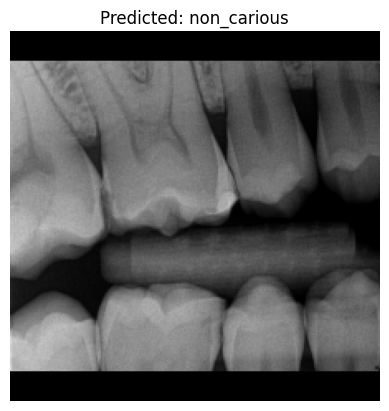

Predicted: non_carious


In [ ]:
import cv2
import torch
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload an image
uploaded = files.upload()
image_path = next(iter(uploaded.keys()))

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
img = cv2.resize(img, (224, 224))  # Resize to match model input size

# Normalize the image (match training normalization)
img = img.astype('float32') / 255.0  # Normalize to [0, 1] range

# Convert to tensor and add batch dimension
img_tensor = torch.tensor(img).permute(2, 0, 1).unsqueeze(0)

# Ensure the model is on the same device (CPU/GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)  # Move model to appropriate device
img_tensor = img_tensor.to(device)  # Move image tensor to appropriate device

# Predict
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

# Class labels (make sure they are in the correct order)
class_labels = ["carious", "non_carious"]

# Plot the image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_labels[predicted.item()]}")
plt.show()

# Print the prediction class label
print(f"Predicted: {class_labels[predicted.item()]}")


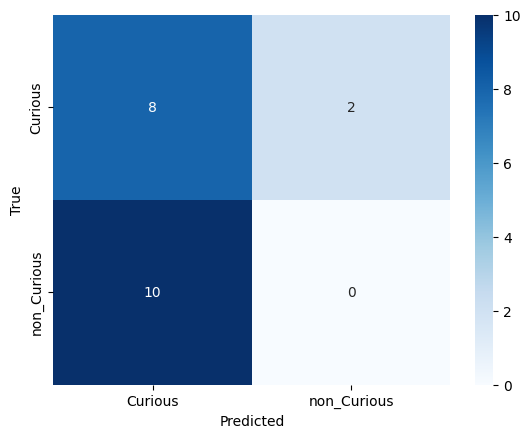

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, test_loader, device, class_labels):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Define your class labels
class_labels = ["Curious", "non_Curious"]

# Plot confusion matrix for the test data
plot_confusion_matrix(model, test_loader, device, class_labels)


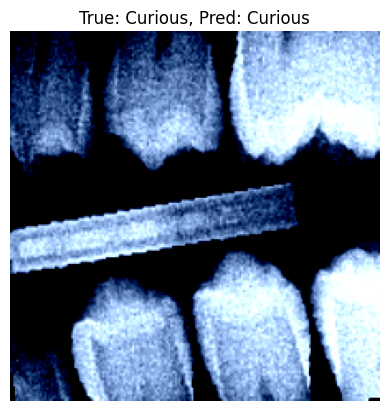

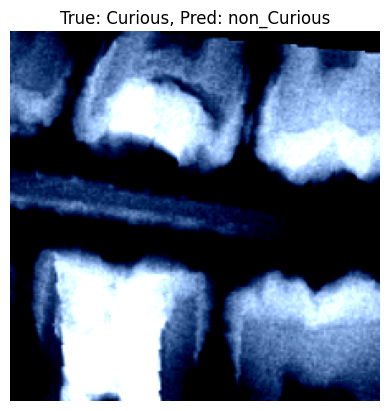

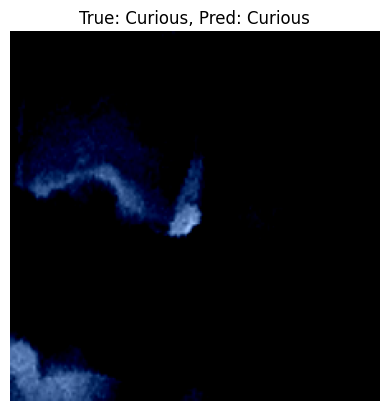

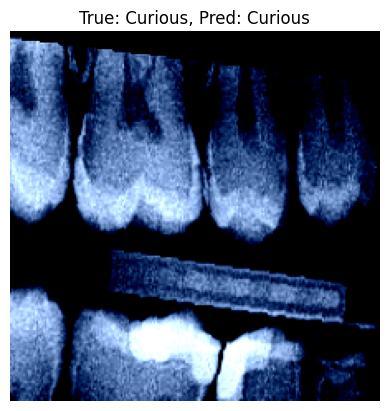

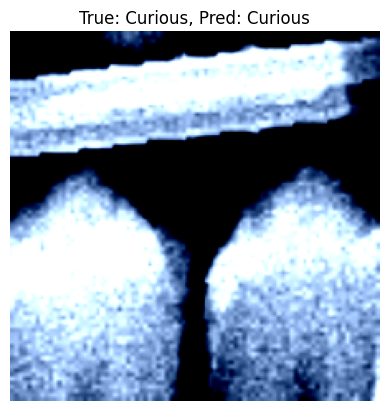

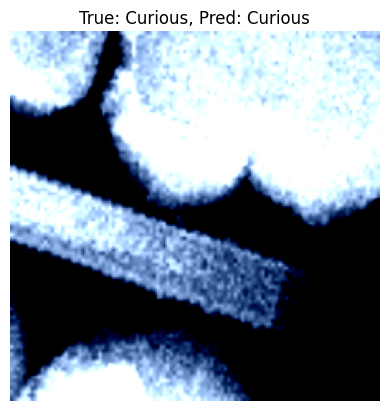

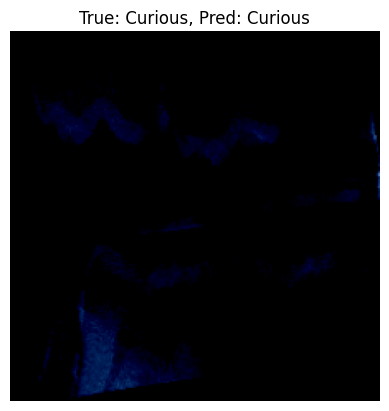

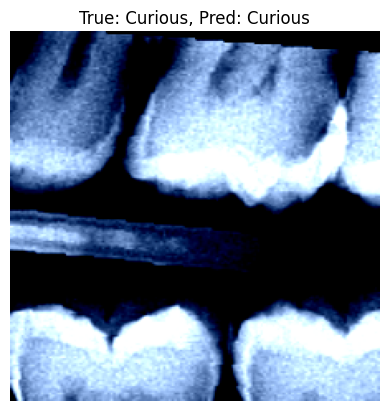

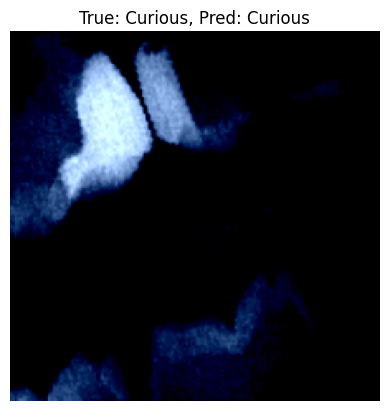

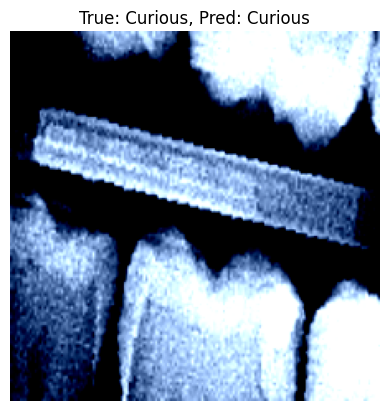

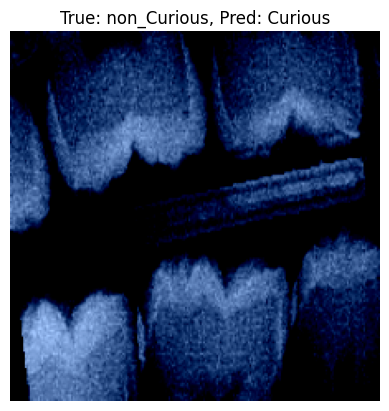

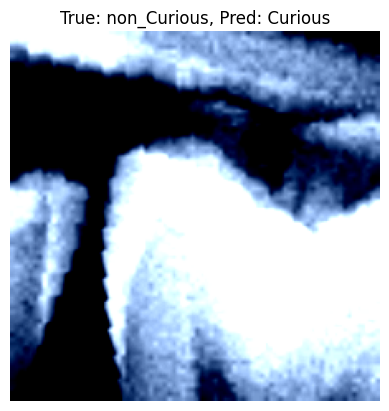

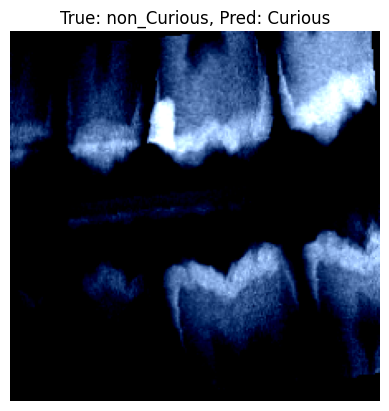

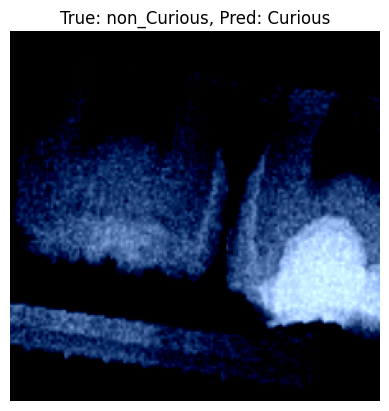

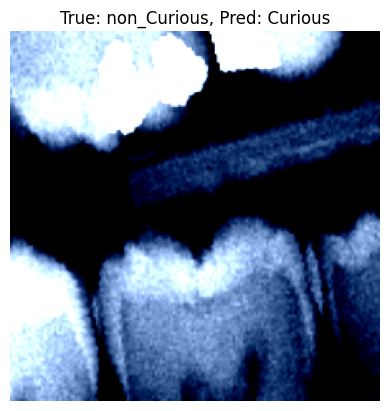

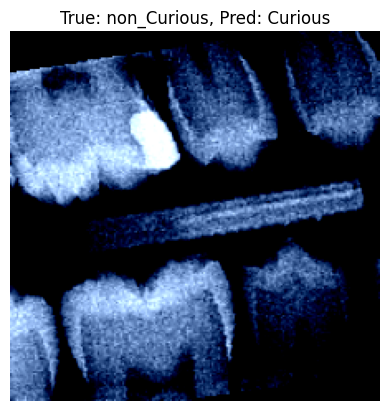

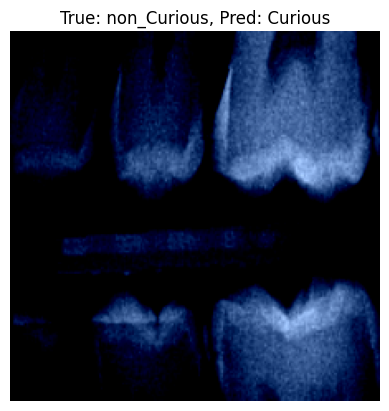

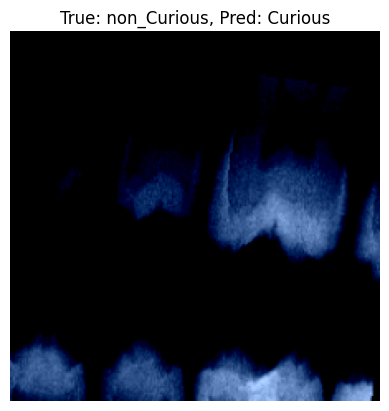

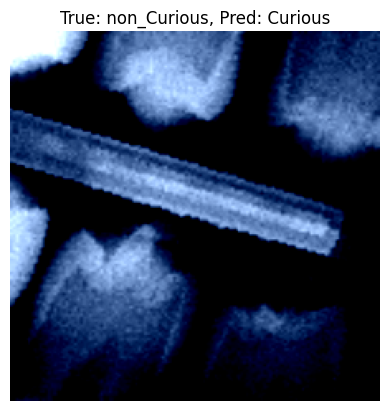

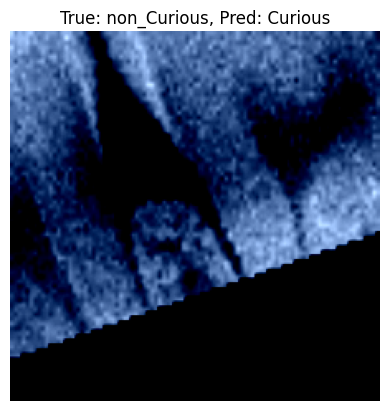

In [ ]:

# Define class labels
class_labels = ["Curious", "non_Curious"]

# Function to visualize predictions
def visualize_predictions(model, test_loader, class_labels):
    with torch.no_grad():
        for images, labels in test_loader:
            # Forward pass to get predictions
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Display images with predicted labels
            for i in range(len(images)):
                img = images[i].cpu().numpy().transpose((1, 2, 0))  # Convert to HWC format
                img = np.clip(img * 255, 0, 255).astype(np.uint8)  # Convert to uint8

                plt.imshow(img)
                plt.axis('off')
                plt.title(f"True: {class_labels[labels[i]]}, Pred: {class_labels[predicted[i].item()]}")
                plt.show()

# Call the function to visualize predictions
visualize_predictions(model, test_loader, class_labels)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import time
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN + LSTM Model
class CNN_LSTM_Model(nn.Module):
    def __init__(self, hidden_size=128):
        super(CNN_LSTM_Model, self).__init__()

        # CNN layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # LSTM layer
        self.lstm = nn.LSTM(input_size=64*8*8, hidden_size=hidden_size, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, 10)  # Assuming 10 classes for CIFAR-10

    def forward(self, x):
        # CNN part
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten and reshape for LSTM input
        x = x.view(x.size(0), -1)
        x = x.view(x.size(0), 1, -1)

        # LSTM
        lstm_out, (hn, _) = self.lstm(x)

        # Fully connected layer
        out = self.fc(hn[-1])
        return out


# Data Augmentation and Transforms
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
])

# Load CIFAR-10 dataset
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Split into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize Model, Loss, and Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN_LSTM_Model(hidden_size=128).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss, train_correct, train_total = 0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()

        train_accuracy = 100. * train_correct / train_total

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

        val_accuracy = 100. * val_correct / val_total

        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss/len(train_loader):.4f}, "
              f"Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss/len(val_loader):.4f}, "
              f"Val Accuracy: {val_accuracy:.2f}%")

        # Save the best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print("Model saved!")

    print("Training complete!")

# Evaluation Function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss, test_correct, test_total = 0, 0, 0
    all_labels, all_preds = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            test_total += labels.size(0)
            test_correct += predicted.eq(labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    test_accuracy = 100. * test_correct / test_total
    print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=dataset.classes))


# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Load the best model and evaluate on the test set
model.load_state_dict(torch.load('best_model.pth'))
evaluate_model(model, test_loader, criterion)
